In [543]:
import math
import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('Тема №8')

In [544]:
%load_ext autoreload
%autoreload 2
from task8 import (Parameters,
                   runge_kutta2,
                   runge_kutta3,
                   full_error_rate,
                   first_step,
                   auto_step,)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [545]:
c2: float = 1 / 9
a21: float = c2
b1: float = 1 - 1 / (2 * c2)
b2: float = 1 / (2 * c2)

params = Parameters(
    ksi=1 / 9,
    A=2 / 11,
    B=3 / 13,
    eps=1e-4,
    p=1e-5,
    tol=1e-9,
    rtol=1e-6,
    pi=np.pi,
    c2=c2,
    a21=a21,
    b1=b1,
    b2=b2,
)

# Посчитаем необходимые коэффициенты
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')


Для двухэтапного метода Рунге-Кутты: 
c2 = 0.1111111111111111, 
a21 = 0.1111111111111111, 
b1 = -3.5, 
b2 = 4.5


In [546]:
# Начальные данные
x0 = 0
x1 = params.pi
y0 = np.array([params.B * params.pi, params.A * params.pi])

### Точное решение поставленной задачи Коши


In [547]:
# Точное решение данной задачи Коши
def y1(x):
    return (params.B * params.pi * np.cos(x * np.sqrt(params.A * params.B))) + (
                (params.A ** 2) * params.pi * np.sin(x * np.sqrt(params.A * params.B)) / np.sqrt(params.A * params.B))


def y2(x):
    return np.sqrt((params.A ** 3) / params.B) * params.pi * np.cos(x * np.sqrt(params.A * params.B)) - np.sqrt(
        (params.B ** 3) / params.A) * params.pi * np.sin(
        x * np.sqrt(params.A * params.B))

y_true = np.array([y1(x1), y2(x1)])
print(y_true)

[ 0.88419223 -0.08446334]


### Часть №1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

In [548]:
s_2 = 2
h_2 = first_step(x0, x1, y0, s_2, params)
n_2 = math.ceil((x1 - x0) / h_2)

s_3 = 3
h_3 = first_step(x0, x1, y0, s_3, params)
n_3 = math.ceil((x1 - x0) / h_3)

In [549]:
# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
fixed_step_results_2 = runge_kutta2(x0, x1, y0, h_2, params)

print(f"n={n_2}, h={h_2}")
print(f"Полученное значение (фиксированный шаг): {fixed_step_results_2[-1]}")
print(f"Реальное значение: {y_true}")
print(f"Полная погрешность: {full_error_rate(x0, x1, y0, h_2, s_2, params)}")

n=108, h=0.029267706336848293
Полученное значение (фиксированный шаг): [ 0.88406888 -0.03705887]
Реальное значение: [ 0.88419223 -0.08446334]
Полная погрешность: 0.0009967011080500138


In [550]:
# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
fixed_step_results_3 = runge_kutta3(x0, x1, y0, h_3, params)

print(f"n={n_3}, h={h_3}")
print(f"Полученное значение (фиксированный шаг): {fixed_step_results_3[-1]}")
print(f"Реальное значение: {y_true}")
print(f"Полная погрешность: {full_error_rate(x0, x1, y0, h_3, s_3, params)}")

n=33, h=0.09600851500211612
Полученное значение (фиксированный шаг): [ 0.88401816 -0.03855829]
Реальное значение: [ 0.88419223 -0.08446334]
Полная погрешность: 2.2745537574309192e-08


### Часть №2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

In [551]:
auto_step_results_2, local_errors_2, steps_2 = auto_step(x0, x1, y0, s_2, params)

df_2 = pd.DataFrame({
    "Шаги (h)": steps_2,
    "Результаты": auto_step_results_2,
    "Локальные ошибки": local_errors_2
})

# Вывод таблицы
print(f"Полученное значение (автоматический шаг): {auto_step_results_2[-1]}")
print(f"Реальное значение: {y_true}\n")
print(df_2)

Полученное значение (автоматический шаг): [ 0.88419154 -0.03316235]
Реальное значение: [ 0.88419223 -0.08446334]

    Шаги (h)                                   Результаты  Локальные ошибки
0   0.029268     [0.7280094689108562, 0.5662918024589599]      3.452613e-08
1   0.029268      [0.731009851993432, 0.5613645872366586]      3.454823e-08
2   0.058535     [0.7369317975713475, 0.5514496280731702]      2.765838e-07
3   0.117071     [0.7484578466026341, 0.5313818667989908]      2.215813e-06
4   0.058535     [0.7540594378106082, 0.5212333723505433]      2.776175e-07
5   0.117071     [0.7649373908660866, 0.5007115729186947]      2.223970e-06
6   0.029268    [0.7675881316226877, 0.49553612184895596]      3.482397e-08
7   0.029268     [0.7702112840925995, 0.4903428604539421]      3.484420e-08
8   0.058535    [0.7753745415799206, 0.47990346680929447]      2.789344e-07
9   0.058535    [0.7804263235171499, 0.46939507740232483]      2.792516e-07
10  0.058535    [0.7853659036091598, 0.45881920302

In [552]:
auto_step_results_3, local_errors_3, steps_3 = auto_step(x0, x1, y0, s_3, params)

df_3 = pd.DataFrame({
    "Шаги (h)": steps_3,
    "Результаты": auto_step_results_3,
    "Локальные ошибки": local_errors_3
})

# Вывод таблицы
print(f"Полученное значение (автоматический шаг): {auto_step_results_3[-1]}")
print(f"Реальное значение: {y_true}\n")
print(df_3)

Полученное значение (автоматический шаг): [ 0.8841877  -0.03311336]
Реальное значение: [ 0.88419223 -0.08446334]

    Шаги (h)                                   Результаты  Локальные ошибки
0   0.096009     [0.7348129797232704, 0.5550266583404456]      5.750458e-09
1   0.096009     [0.7443588566269742, 0.5386400007782968]      5.737424e-09
2   0.192017      [0.7625833411737031, 0.505248114400031]      9.156386e-08
3   0.384034    [0.7954661336174825, 0.43617195183120105]      1.457715e-06
4   0.192017      [0.8100746249490921, 0.400595262842938]      9.041392e-08
5   0.384034    [0.8355106943281149, 0.32763840856690335]      1.440340e-06
6   0.384034      [0.855779150830376, 0.2526553829667796]      1.430590e-06
7   0.048004    [0.8579429313137542, 0.24316308067836068]      3.475425e-10
8   0.048004    [0.8600237592671184, 0.23364726751846315]      3.473254e-10
9   0.048004    [0.8620214335000652, 0.22410886354918863]      3.471163e-10
10  0.048004    [0.8639357608621335, 0.21454879101

### Часть №3. Анализ эффективности методов Рунге-Кутты

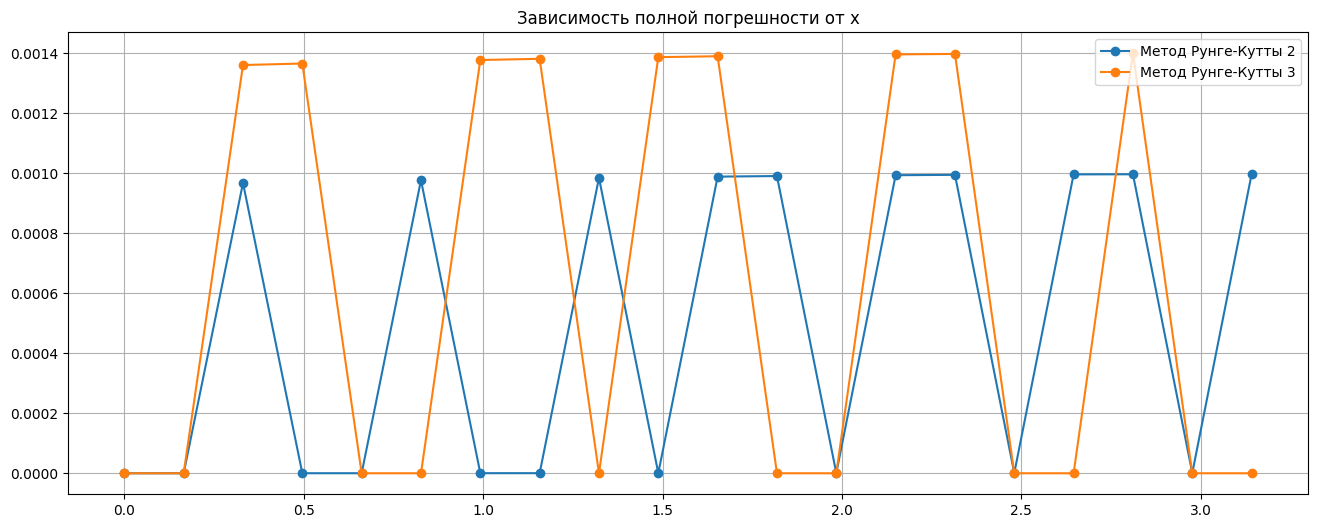

In [553]:
n_part = 20
args = np.linspace(x0, x1, n_part)

# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
step_errors_2 = []
for x in args:
    real_y = np.array([y1(x), y2(x)])
    step_errors_2.append(full_error_rate(x0, x, y0, h_2, s_2, params))

# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
step_errors_3 = []
for x in args:
    real_y = np.array([y1(x), y2(x)])
    step_errors_3.append(full_error_rate(x0, x, y0, h_3, s_3, params))

# Строим графики
plt.figure(figsize=(16, 6))
plt.title('Зависимость полной погрешности от x')
plt.plot(args, step_errors_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(args, step_errors_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

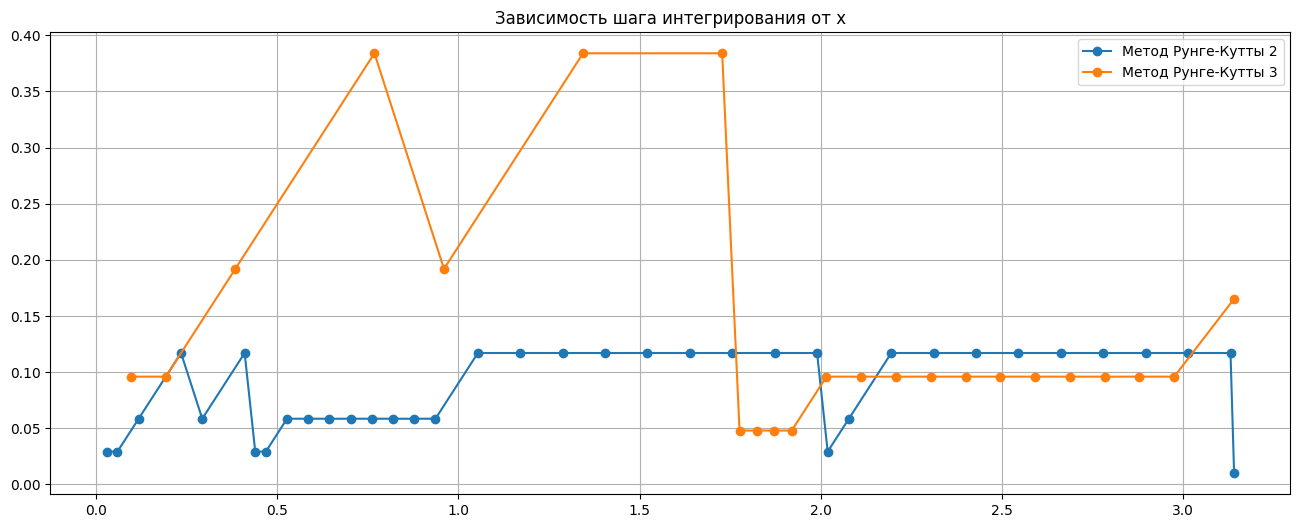

In [554]:
# Строим графики
plt.figure(figsize=(16, 6))
plt.title('Зависимость шага интегрирования от x')
plt.plot(x0 + np.cumsum(steps_2), steps_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(x0 + np.cumsum(steps_3), steps_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

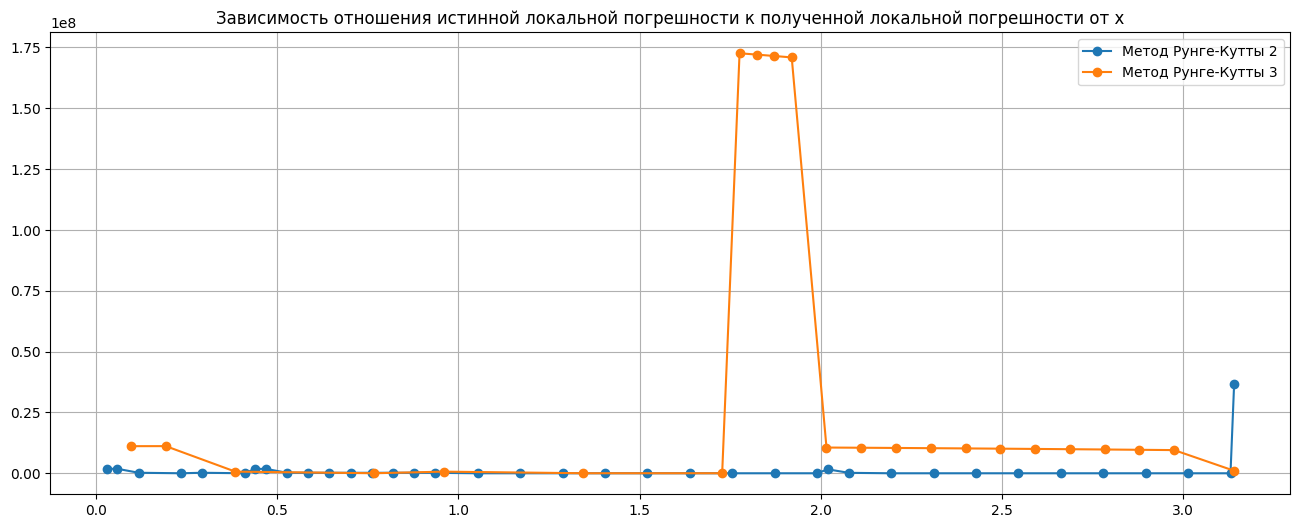

In [555]:
# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
args_2 = x0 + np.cumsum(steps_2) # Точки x, в которых считали ДУ
real_loc_error_2 = np.zeros(len(args_2))
for i in range(len(args_2)):
    real_y = np.array([y1(args_2[i]), y2(args_2[i])])
    real_loc_error_2[i] = norm(real_y - auto_step_results_2[i])
ksi_2 = real_loc_error_2 / local_errors_2

# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
args_3 = x0 + np.cumsum(steps_3) # Точки x, в которых считали ДУ
real_loc_error_3 = np.zeros(len(args_3))
for i in range(len(args_3)):
    real_y = np.array([y1(args_3[i]), y2(args_3[i])])
    real_loc_error_3[i] = norm(real_y - auto_step_results_3[i])
ksi_3 = real_loc_error_3 / local_errors_3

# Построение графиков
plt.figure(figsize=(16, 6))
plt.title('Зависимость отношения истинной локальной погрешности к полученной локальной погрешности от x')
plt.plot(args_2, ksi_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(args_3, ksi_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

### Автоматический выбор шага интегрирования